In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [122]:
data = pd.read_csv("mail_data.csv")

In [123]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot: >

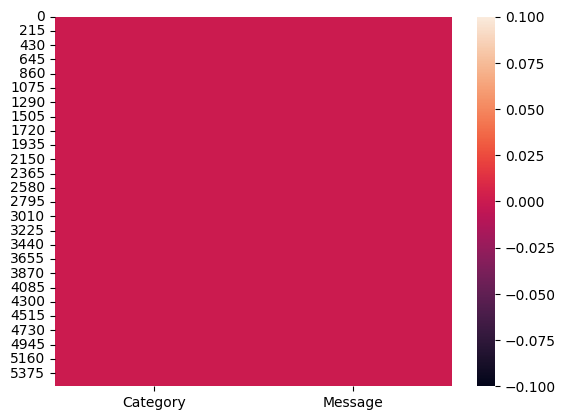

In [124]:
sns.heatmap(data.isnull())

No columns with null values

In [125]:
data.shape

(5572, 2)

In [126]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

In [127]:
def removeStopWords(text):
    words = text.split()
    words = [word.lower() for word in words if word.lower() not in stop_words]  # Remove stop words
    return ' '.join(words)


In [128]:
def stemmingWords(text):
    words = [ps.stem(word) for word in text.split()]
    return ' '.join(words)

In [129]:
data.sample(10)

,Category,Message
4667,ham,Not..tel software name..
5020,ham,Great! How is the office today?
1500,spam,"SMS. ac JSco: Energy is high, but u may not kn..."
3903,ham,"Right on brah, see you later"
4635,ham,These won't do. Have to move on to morphine
945,ham,I sent my scores to sophas and i had to do sec...
4938,ham,G wants to know where the fuck you are
52,ham,K fyi x has a ride early tomorrow morning but ...
2698,ham,Can you use foreign stamps for whatever you se...
667,ham,Carlos'll be here in a minute if you still nee...


In [130]:
data["Message"] = data["Message"].apply(removeStopWords)

In [131]:
data['Message'] = data["Message"].apply(stemmingWords)

In [132]:
data.Message.head()

0    go jurong point, crazy.. avail bugi n great wo...
1                          ok lar... joke wif u oni...
2    free entri 2 wkli comp win fa cup final tkt 21...
3            u dun say earli hor... u c alreadi say...
4                nah think goe usf, live around though
Name: Message, dtype: object

In [133]:
print(data["Message"][3])

u dun say earli hor... u c alreadi say...


Data has been separated, now what should I do?
I need two things, convert ham/spam to 0,1
I need to give each word a value in the string of the body message

In [134]:
data["Category"].values

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [135]:
data['Category'] = data['Category'].map({'spam': 0, 'ham': 1})

spam = 0, ham = real = 1

In [136]:
data.Category

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64

In [137]:
data.sample(10)

,Category,Message
608,1,meant say cant wait see u get bore bridgwat ba...
277,1,tell rob mack gf theater
2620,0,<forward 21870000>hi - mailbox messag sm alert...
5426,1,oh yeah! diet flew window
1157,1,hey.. someth came last min.. think wun sign tm...
5049,1,yeah basic time next week get away mom &amp; g...
3745,1,nobodi name peni girl name stori add
4739,1,bought test yesterday. someth let know exact d...
2434,1,indian r poor india poor country. say one swis...
5294,0,xma iscom & ur award either £500 cd gift vouch...


In [138]:
Y = data["Category"]
X = data["Message"]

In [139]:
X

0       go jurong point, crazy.. avail bugi n great wo...
1                             ok lar... joke wif u oni...
2       free entri 2 wkli comp win fa cup final tkt 21...
3               u dun say earli hor... u c alreadi say...
4                   nah think goe usf, live around though
                              ...                        
5567    2nd time tri 2 contact u. u £750 pound prize. ...
5568                             ü b go esplanad fr home?
5569             pity, * mood that. so...ani suggestions?
5570    guy bitch act like i'd interest buy someth els...
5571                                      rofl. true name
Name: Message, Length: 5572, dtype: object

In [140]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64

In [141]:
vectorizer = TfidfVectorizer()

In [142]:
vectorizer.fit(X)

TfidfVectorizer()

In [143]:
vectorizedX = vectorizer.transform(X)

In [144]:
print(vectorizedX)

  (0, 8066)	0.22962269749428962
  (0, 7858)	0.1892146376670875
  (0, 5661)	0.25827574458086533
  (0, 4290)	0.28937206929337134
  (0, 4173)	0.34253158750893153
  (0, 3492)	0.1892146376670875
  (0, 3452)	0.16058011098012456
  (0, 3407)	0.13794804480121792
  (0, 2255)	0.30739505718901877
  (0, 1995)	0.28937206929337134
  (0, 1717)	0.30040366604489843
  (0, 1715)	0.32698342515267853
  (0, 1296)	0.26526713572498567
  (0, 1068)	0.34253158750893153
  (1, 7975)	0.43651585199297055
  (1, 5288)	0.556006883677782
  (1, 5258)	0.2765613566485246
  (1, 4327)	0.41533459133332773
  (1, 4137)	0.5013195084100336
  (2, 8025)	0.19124592654884076
  (2, 7987)	0.14602362722090279
  (2, 7537)	0.12364446832430408
  (2, 7356)	0.2216183032548593
  (2, 7211)	0.1190876011852433
  (2, 6871)	0.1974149818834124
  :	:
  (5568, 3407)	0.2900009528925707
  (5568, 3210)	0.5576572124830113
  (5568, 2866)	0.6874001368485954
  (5569, 7237)	0.25114395890631247
  (5569, 7000)	0.4874939876356764
  (5569, 6686)	0.325383442120283

Message data has been vectorized and separated to give numerical value to each word in each Message row

In [145]:
X_train, X_test, y_train, y_test = train_test_split(vectorizedX, Y, test_size=0.2, random_state=42)


In [146]:
X_train.shape

(4457, 8234)

In [147]:
X_test.shape

(1115, 8234)

In [148]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [160]:
y_train_pred = logistic_regression_model.predict(X_train)


In [161]:
print("Accuracy:", accuracy_score(y_train, y_train_pred))

Accuracy: 0.9692618353152345


No overfitting/Underfitting of data

In [149]:
y_pred = logistic_regression_model.predict(X_test)

In [150]:
print(y_pred)

[1 1 1 ... 1 1 1]


In [155]:
print(y_pred[:30])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]


In [154]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.95695067264574


Good prediction score

In [156]:
data.sample(30)

,Category,Message
2422,1,err... cud do. i'm go 8pm. got way contact then.
5354,1,aiyo co sm ü ü neva repli wait 4 ü repli lar. ...
5539,1,sleeping..and surf
1501,1,host-bas idp linux systems.
3662,1,well great weekend!
1030,1,"good, we'll find way"
1216,1,"would good … i'll phone tomo lunchtime, shall ..."
1263,0,"hungri gay guy feel hungri 4 it, now. call 087..."
2019,1,ya came ago
4430,1,hey r watch movi tonight i'll prob b home earl...
